In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

labels = pd.read_csv('train_output.csv', index_col=False)
data = pd.read_csv('Train set/clean-data.csv', index_col=False)
 

data.head()

,Unnamed: 0,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
0,2,0.027815,0.274892,48.559242,1.537964,0.650210,5431.333210,0.275228,19786.0,3.942944e+09,...,1.457980,555.378594,14592.303727,0.891330,0.003562,954.749135,0.003384,851.987373,0.004444,1651.710761
1,3,0.023015,0.188210,75.703368,1.744961,0.573079,10369.568729,0.240727,43168.0,3.122890e+09,...,2.512125,1766.619373,22881.932686,0.766032,0.002246,1092.823724,0.002069,884.838627,0.003633,3386.995589
2,4,0.027348,0.265740,70.434367,1.555420,0.642913,10558.818691,0.200766,52655.0,1.059535e+09,...,4.096838,3462.816344,18773.106002,0.644554,0.001880,878.989601,0.001635,634.910036,0.004869,4232.418080
3,5,0.026811,0.255406,46.818800,1.576120,0.634469,4221.412123,0.323878,13074.0,6.583324e+08,...,1.824328,683.869792,7978.285176,0.828138,0.002855,907.045929,0.002680,774.885387,0.003901,1844.746046
4,6,0.023691,0.199424,53.795911,1.711620,0.584242,5295.900331,0.327241,16237.0,8.072532e+08,...,2.652580,962.094760,7520.054910,0.734898,0.006710,1513.420445,0.004704,1197.140900,0.023273,4444.272812


In [32]:
labels.head()

,PatientID,SurvivalTime,Event
0,202,1378,0
1,371,379,1
2,246,573,1
3,240,959,0
4,284,2119,0


In [31]:
Event = labels['Event']
Event.head()

0    0
1    1
2    1
3    0
4    0
Name: Event, dtype: int64

In [20]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X = array[:,0:53]

y = labels['SurvivalTime']
y.head()

0    1378
1     379
2     573
3     959
4    2119
Name: SurvivalTime, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to 1 standard deviation).
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [22]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=14)
fit = pca.fit(Xs)

# summarize components
print(fit.explained_variance_)
var = fit.explained_variance_ratio_
print(fit.explained_variance_ratio_.cumsum())
print(var)

[25.56614676  8.18901919  4.01963226  3.08003912  2.41853172  2.02710271
  1.29841875  1.20742522  1.00176896  0.97597425  0.85643215  0.44554272
  0.42509393  0.27856148]
[0.48077219 0.63476696 0.71035627 0.7682765  0.81375707 0.8518768
 0.8762936  0.89899927 0.91783757 0.93619079 0.95229603 0.96067447
 0.96866838 0.97390673]
[0.48077219 0.15399476 0.07558931 0.05792023 0.04548057 0.03811973
 0.02441681 0.02270567 0.0188383  0.01835323 0.01610523 0.00837844
 0.0079939  0.00523836]


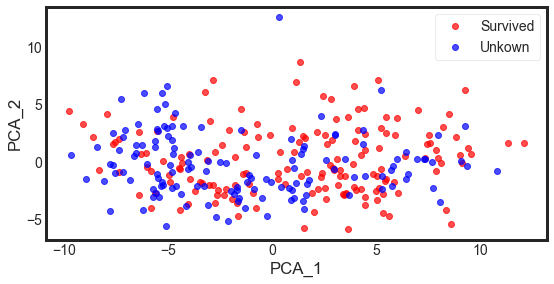

In [23]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][labels.Event == 1],PCA_df['PCA_2'][labels.Event == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][labels.Event == 0],PCA_df['PCA_2'][labels.Event == 0],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Survived','Unkown'])
plt.show()

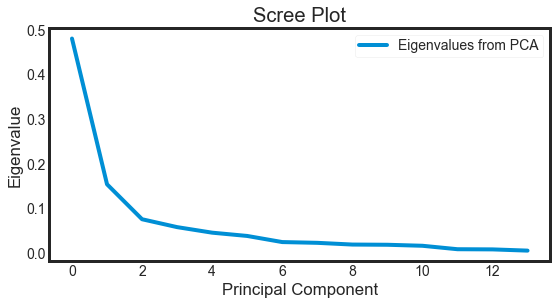

In [24]:
# Elbow graph for number of dimensions to retain.
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [25]:
X_pca

array([[-4.73938338e+00,  1.18558103e+00, -2.37470828e-01, ...,
         5.73234739e-01, -4.89526740e-01,  2.80750835e-01],
       [ 3.38738657e-01,  8.40441310e-01,  1.02577519e-01, ...,
         1.04340984e-01, -1.52862031e-01, -1.69474743e-01],
       [ 3.52529232e+00, -2.75138602e+00,  4.79910250e-01, ...,
        -1.65360171e-01, -3.07849398e-01,  8.61716203e-02],
       ...,
       [ 8.04529005e+00, -3.46780003e+00,  2.44577418e-01, ...,
         1.90890278e+00,  1.78401899e-01,  6.00879860e-01],
       [-8.11150302e+00, -1.67536692e+00,  1.02900428e+00, ...,
        -5.83029267e-02, -2.16946788e-01,  1.37432867e-01],
       [ 1.01392373e+00, -5.59122157e-01, -2.72035468e-02, ...,
        -3.03043771e-01, -3.37793800e-01, -3.94689867e-03]])

In [26]:
pca_trainset = pd.DataFrame(X_pca)
y = pd.DataFrame(y)


In [27]:
y.head()

,SurvivalTime
0,1378
1,379
2,573
3,959
4,2119


In [36]:
#save the cleaner version of dataframe for future analyis
pca_trainset.to_csv('pca_trainset.csv')
y.to_csv('labels.csv')
Event.to_csv('Event.csv')
